Mean squared error: 15.866785321410013
coefficient of determination: 0.7005679318941365


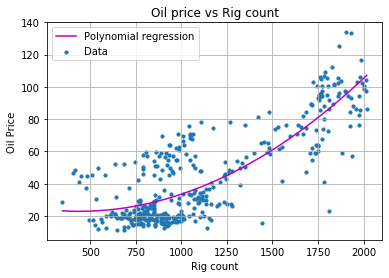

In [7]:
import operator
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures

data=pd.read_csv("Rig_Count_vs._Spot_Price.csv")
data['Date'] = pd.to_datetime(data['Date'])

Oil_Price_y = data["Oil_Price"][:, np.newaxis]
Rig_count_x= data["Rig_count"][:, np.newaxis]

polynomial_features= PolynomialFeatures(degree=2)
x_poly = polynomial_features.fit_transform(Rig_count_x)

model = LinearRegression()
model.fit(x_poly, Oil_Price_y)
y_poly_pred = model.predict(x_poly)

rmse = np.sqrt(mean_squared_error(Oil_Price_y,y_poly_pred))
r2 = r2_score(Oil_Price_y,y_poly_pred)
print('Mean squared error:',rmse)
print('coefficient of determination:', r2)

plt.scatter(Rig_count_x, Oil_Price_y, s=10,label='Data')
plt.xlabel('Rig count')
plt.ylabel('Oil Price')

sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(Rig_count_x,y_poly_pred), key=sort_axis)
Rig_count_x, y_poly_pred = zip(*sorted_zip)
plt.plot(Rig_count_x, y_poly_pred, color='m', label='Polynomial regression')
plt.title("Oil price vs Rig count")
plt.grid()
plt.legend()
plt.show()